In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
df = pd.read_csv('bank-full.csv', delimiter=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [89]:
# Task: Use the dataset to estimate the observed conversion rate difference between two groups.
# To simulate A/B test lets split the dataset into 2 groups

# randomize df
df = df.sample(frac=1, random_state=45)

# split into 2 halves
mid = len(df) // 2
email_a_customers_df = df.iloc[:mid].copy()
email_b_customers_df = df.iloc[mid:].copy()

print(email_a_customers_df.head())
print(email_b_customers_df.head())

       age         job   marital  education  ... pdays  previous poutcome   y
6367    28  unemployed   married  secondary  ...    -1         0  unknown  no
8215    46  technician   married  secondary  ...    -1         0  unknown  no
19376   57  technician   married   tertiary  ...    -1         0  unknown  no
37998   27      admin.    single  secondary  ...    -1         0  unknown  no
41843   83     retired  divorced    primary  ...    -1         0  unknown  no

[5 rows x 17 columns]
       age          job   marital  education  ... pdays  previous poutcome   y
3100    41  blue-collar   married    primary  ...    -1         0  unknown  no
1766    47  blue-collar  divorced  secondary  ...    -1         0  unknown  no
29872   29   technician  divorced  secondary  ...    -1         0  unknown  no
3786    29  blue-collar    single  secondary  ...    -1         0  unknown  no
41075   55      retired   married    primary  ...    -1         0  unknown  no

[5 rows x 17 columns]


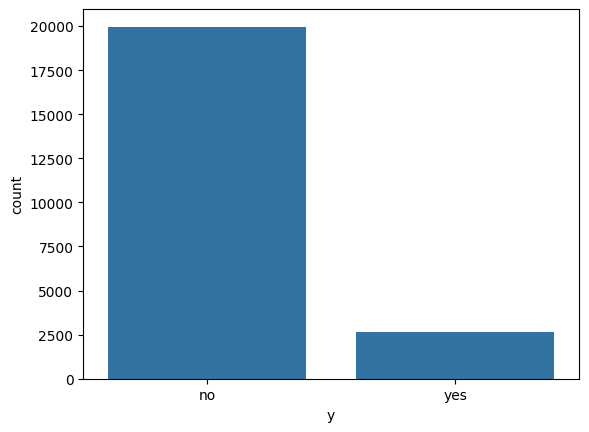

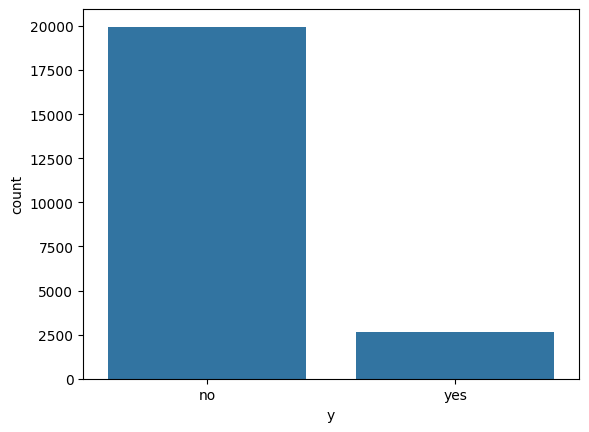

In [90]:
# Lets compare stats of success stats of customers who were sent email a and who were sent email b

sns.countplot(x = email_a_customers_df['y'])
plt.show()

sns.countplot(x = email_b_customers_df['y'])
plt.show()

In [91]:
# Conversion rates of group a and group b

group_a_positive = email_a_customers_df[email_a_customers_df['y'] == "yes"]
group_a_positive_rate = len(group_a_positive)/len(email_a_customers_df) * 100

print(f'Success rate of email a: {group_a_positive_rate}')



group_b_positive = email_b_customers_df[email_b_customers_df['y'] == "yes"]
group_b_positive_rate = len(group_b_positive)/len(email_b_customers_df) * 100

print(f'Success rate of email b: {group_b_positive_rate}') # As obsvered email a had a very little higher rate than email b

Success rate of email a: 11.687679716876797
Success rate of email b: 11.709280721932231


In [94]:
# Task: Determine the minimum sample size required to detect a significant difference (e.g., with α = 0.05, power = 0.8) in conversion rates.
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize

email_a_customers_df['y'] = email_a_customers_df['y'].apply(lambda x: 0 if x == 'no' else 1)
email_b_customers_df['y'] = email_b_customers_df['y'].apply(lambda x: 0 if x == 'no' else 1)

mean_a =  email_a_customers_df['y'].mean()
mean_b =  email_b_customers_df['y'].mean()

effect_size = proportion_effectsize(mean_a, mean_b)

power_analysis = NormalIndPower()

res = power_analysis.solve_power(alpha=0.05, power=0.8, effect_size=effect_size, alternative='larger')
res.as_integer_ratio()

# In most of the cases, as the effect size if 0 it means there's no real accountable difference between these 2 email. And both the datasets have almost same destribution

ValueError: Cannot detect an effect-size of 0. Try changing your effect-size.